# 3. Entendiendo los datos

¿Pero qué se debe tener en cuenta para comenzar con el análisis de datos? Preste mucha atención, pues a continuación se darán a conocer varias acciones que son necesarias en el momento de estudiar datos, como, por ejemplo:
- La preparación de la infraestructura
- La determinación de los tipos de datos
- El ordenamiento de los datos y su agrupamiento
- La identificación de datos nulos y de datos duplicados
- Qué hacer con estos tipos de datos
- Los diferentes formatos utilizados para el análisis
- Entre otros.

## 3.1 Prepare la infraestructura

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('_mpl-gallery-nogrid')

## 3.2 Lectura de datos

In [2]:
df = pd.read_csv("DatosSeguros.csv")

In [3]:
df.head()

,edad,sexo,imc,hijos,fumador,region,valor_seguro
0,19,F,27.90,0,yes,Caribe,16884.9240
1,19,F,27.90,0,yes,Caribe,16884.9240
2,19,F,27.90,0,yes,Caribe,16884.9240
3,18,M,33.77,1,no,Cundinamarca,1725.5523
4,28,M,33.00,3,no,Cundinamarca,4449.4620


### **Descripción de columnas:**

- edad: Edad de la persona, en años
- sexo: Sexo de la persona (masculino: M/femenino: F)
- imc: Índice de Masa Corporal
- hijos: El número de hijos que tiene la persona
- fumador: La persona es fumadora (yes/no)
- region: Región o Departamento
- valor_seguro: El valor del seguro para esa persona

## 3.3 Identificación de los datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   edad          1349 non-null   int64  
 1   sexo          1349 non-null   object 
 2   imc           1347 non-null   float64
 3   hijos         1349 non-null   int64  
 4   fumador       1347 non-null   object 
 5   region        1349 non-null   object 
 6   valor_seguro  1349 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.9+ KB


## 3.4 Manipular los datos

### 3.4.1 Detectar valores vacíos o nulos

In [5]:
df.isnull().sum()

edad            0
sexo            0
imc             2
hijos           0
fumador         2
region          0
valor_seguro    0
dtype: int64

### 3.4.2 Eliminar o reemplazar valores vaciós o nulos

Filas con valores nulos en "imc" y "fumador":

In [6]:
df[df.imc.isnull() | df.fumador.isnull()]

,edad,sexo,imc,hijos,fumador,region,valor_seguro
267,46,M,42.35,3,NaN,Cundinamarca,46151.1245
274,41,M,37.05,2,NaN,Antioquia,7265.7025
277,47,F,NaN,2,no,Boyaca,9715.8410
280,59,M,NaN,2,no,Cundinamarca,12928.7911


In [7]:
total_registros = df.shape[0]
total_nulos = df.isnull().sum().sum()
proporcion_nulos = str(round((total_nulos/total_registros)*100,3))+"%"
proporcion_nulos

'0.297%'

Se pueden eliminar, dado que este porcentaje tan pequeño no tendrá una mayor afectación para el análisis

In [8]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1345 entries, 0 to 1348
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   edad          1345 non-null   int64  
 1   sexo          1345 non-null   object 
 2   imc           1345 non-null   float64
 3   hijos         1345 non-null   int64  
 4   fumador       1345 non-null   object 
 5   region        1345 non-null   object 
 6   valor_seguro  1345 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 84.1+ KB


### 3.4.3 Eliminar valores duplicados

Ver valores duplicados:

In [9]:
df[df.duplicated(keep=False)]

,edad,sexo,imc,hijos,fumador,region,valor_seguro
0,19,F,27.900,0,yes,Caribe,16884.92400
1,19,F,27.900,0,yes,Caribe,16884.92400
2,19,F,27.900,0,yes,Caribe,16884.92400
197,19,M,30.590,0,no,Antioquia,1639.56310
583,19,M,30.590,0,no,Antioquia,1639.56310
1228,38,M,16.815,2,no,Boyaca,6640.54485
1229,38,M,16.815,2,no,Boyaca,6640.54485
1230,38,M,16.815,2,no,Boyaca,6640.54485
1231,38,M,16.815,2,no,Boyaca,6640.54485
1235,52,M,34.485,3,yes,Antioquia,60021.39897


In [10]:
df[df.duplicated(keep=False)].drop_duplicates().shape

(5, 7)

Hay 5 filas que se repiten al menos una vez.

Eliminar valores duplicados:

In [11]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1333 entries, 0 to 1347
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   edad          1333 non-null   int64  
 1   sexo          1333 non-null   object 
 2   imc           1333 non-null   float64
 3   hijos         1333 non-null   int64  
 4   fumador       1333 non-null   object 
 5   region        1333 non-null   object 
 6   valor_seguro  1333 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.3+ KB


## 3.5 Ordenamiento de datos

Datos ordenados por edad de menor a mayor:

In [12]:
edad_menor_mayor = df.sort_values('edad')
edad_menor_mayor.head()

,edad,sexo,imc,hijos,fumador,region,valor_seguro
1097,18,F,31.35,4,no,Boyaca,4561.1885
59,18,M,31.68,2,yes,Cundinamarca,34303.1672
1251,18,M,33.33,0,no,Cundinamarca,1135.9407
297,18,M,22.99,0,no,Boyaca,1704.5681
1255,18,F,39.82,0,no,Cundinamarca,1633.9618


Datos ordenados ordenado por edad de mayor a menor:

In [13]:
edad_mayor_menor = df.sort_values('edad', ascending=False)
edad_mayor_menor.head()

,edad,sexo,imc,hijos,fumador,region,valor_seguro
422,64,M,33.880,0,yes,Cundinamarca,46889.26120
754,64,M,37.905,0,no,Antioquia,14210.53595
404,64,F,32.965,0,no,Antioquia,14692.66935
420,64,M,39.160,1,no,Cundinamarca,14418.28040
380,64,F,30.115,3,no,Antioquia,16455.70785


## 3.6 Agrupamiento de datos

Se dará una etiqueta a cada fila dependiendo del rango de edad en el que se encuentre la persona.
- 18 a 28 : A
- 29 a 38 : B
- 39 a 48 : C
- 49 a 58 : D
- 59 a 68 : E

Definir los rangos de edades:

In [14]:
rangos = [17, 28, 38, 48, 58, 68]

Establecer nombre para cada rango:

In [15]:
nombre_rango = ['A', 'B', 'C', 'D', 'E']

Crear nueva columna para Rango Edad:

In [16]:
df['Rango_edad'] = pd.cut(df['edad'], rangos, labels = nombre_rango)
df.head()

,edad,sexo,imc,hijos,fumador,region,valor_seguro,Rango_edad
0,19,F,27.900,0,yes,Caribe,16884.92400,A
3,18,M,33.770,1,no,Cundinamarca,1725.55230,A
4,28,M,33.000,3,no,Cundinamarca,4449.46200,A
5,33,M,22.705,0,no,Antioquia,21984.47061,B
6,32,M,28.880,0,no,Antioquia,3866.85520,B


# 4. Métodos para el Análisis de datos

Con el análisis exploratorio de datos, es posible comprender y llegar a conclusiones de hipótesis sin tener que centrarse en el desarrollo de complicados algoritmos.

Dentro de los métodos que se pueden utilizar en el análisis exploratorio, se encuentran los análisis propios de la estadística descriptiva, además de las visualizaciones gráficas, que permiten llegar a conclusiones de manera más fácil y precisa.

En ese sentido, se pueden encontrar, dentro del análisis de datos, variables que son categóricas y variables numéricas, y dependiendo de ellas, se aplicarán métodos que permitan generar algún tipo de información de interés.

## 4.1 Medidas de tendencia central y de dispersión

Las medidas de tendencia central permitirán revisar el comportamiento de los datos desde el punto de vista del análisis estadístico; desde esta perspectiva, se aplicarán los distintos métodos, entre los que se encuentran la media, la moda, la mediana, la desviación estándar y los cuartiles, que ya se han definido en el primer componente formativo.

Para empezar, se procederá a aplicar los métodos de tendencia central a todos los datos; para tal fin, se debe aplicar el siguiente comando, el cual permitirá obtener el análisis de todas las variables, especificando la media, mediana, valores mínimos y máximos, desviación estándar y cuartiles.

In [17]:
df.describe()

,edad,imc,hijos,valor_seguro
count,1333.000000,1333.000000,1333.000000,1333.000000
mean,39.195049,30.652097,1.092273,13261.908454
std,14.052008,6.097609,1.205484,12093.507648
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.220000,0.000000,4738.268200
50%,39.000000,30.360000,1.000000,9377.904700
75%,51.000000,34.675000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


## 4.1 Gráficos
Otra medida que se puede aplicar para el análisis de datos es el uso de diferentes tipos de gráficos, los cuales permiten una visualización más clara. Con el uso de los gráficos, se puede realizar una distribución mucho más efectiva de los datos, lo que facilita su interpretación.

Los tipos de gráficos que pueden utilizarse dentro del análisis exploratorio de datos son:

### 4.1.1 Histogramas de frecuencia
Calculan la cantidad de datos presentes en un elemento o en un rango.

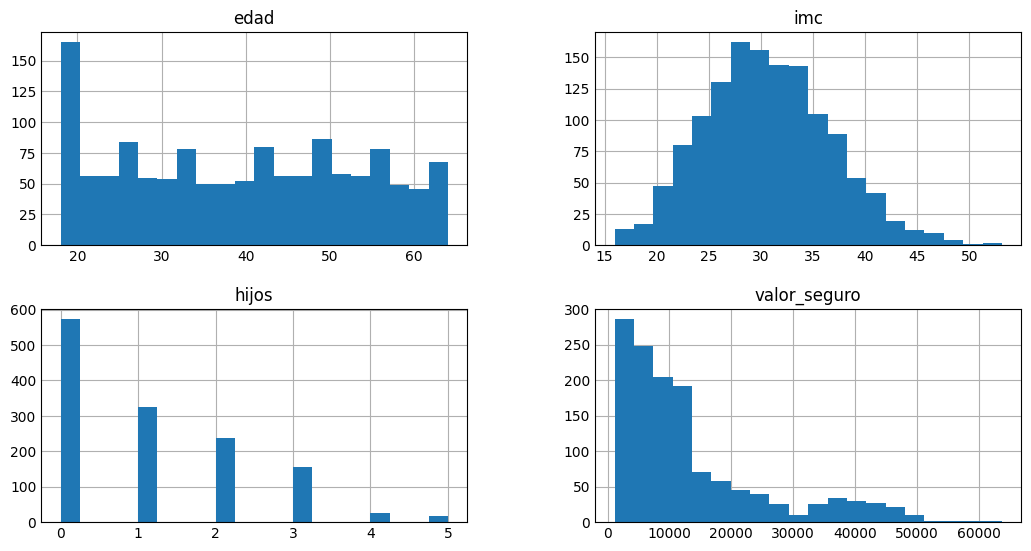

In [18]:
df.hist(bins=20,figsize=(10,5))
plt.show()

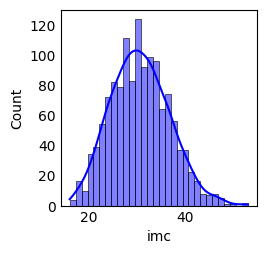

In [19]:
sns.histplot(df.imc, color='b', bins=30, kde=True)
plt.show()

### 4.1.2 Gráfico de barras

Son una muy buena herramienta que permite determinar cómo se distribuyen los datos, para
aplicarlo al ejemplo que se ha venido trabajando, se debe usar el siguiente comando:

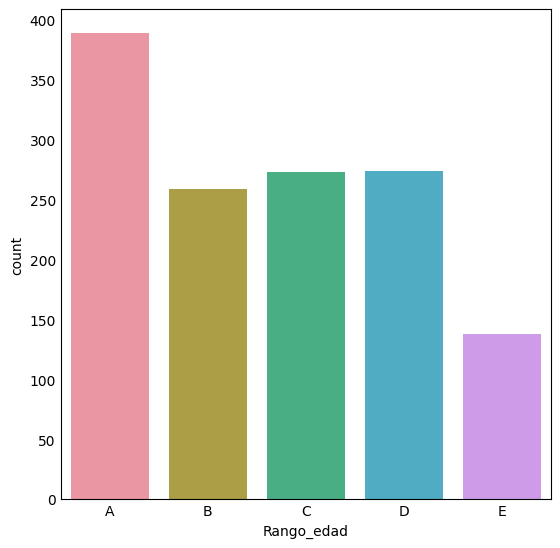

In [20]:
plt.figure(figsize=(5,5))
sns.countplot(x=df.Rango_edad)
plt.show()

#### Los resultados arrojados en el gráfico demuestran:
- En el grupo A edades entre 18 y 28 años se presenta una alta concentración de los datos
- La concentración de los datos para los grupos B, C y D es similar.
- El rango con menor número de elementos corresponde al DE edades entre 58 y 68.

### 4.1.3 Gráfico de torta o pastel
Al generar las gráficas propuestas anteriormente, se pudo detectar algunas concentraciones
mayores en algunas de las variables, los gráficos de torta ayudan a determinar dichas tendencias,
hasta el momento se han obtenidos los análisis descriptivos del comportamiento de las variables,
pero es importante cuantificar estos resultados, ejecute los comandos que se muestran en la
imagen para calcular y graficar cómo están distribuidos los datos porcentualmente:

#### Distribución porcentual de hijos

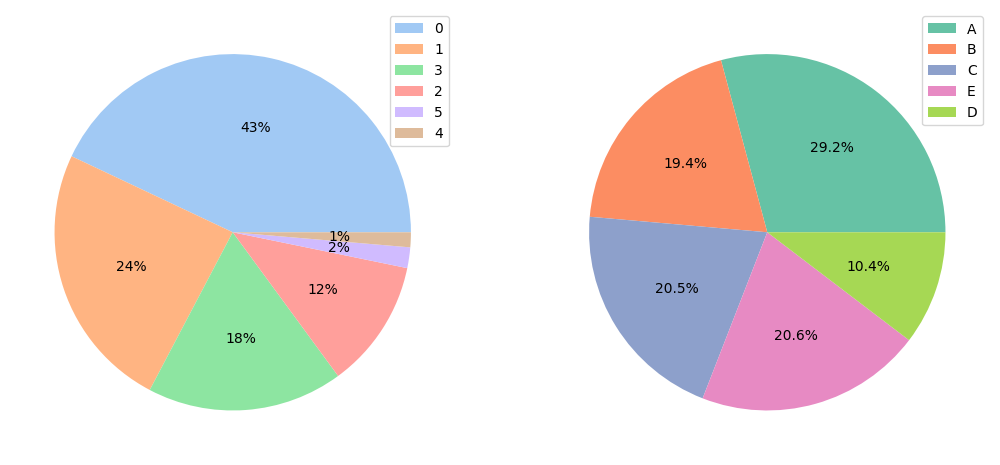

In [21]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

total_hijos = df['hijos'].groupby(df['hijos']).count()
total_rango_edad = df['Rango_edad'].groupby(df['Rango_edad']).count()

labels_hijos = df['hijos'].unique()
labels_rango_edad = df['Rango_edad'].unique()

colors_hijos = sns.color_palette('pastel')[0:6]
colors_rango_edad = sns.color_palette('Set2')[0:5]

ax[0].pie(total_hijos, colors = colors_hijos, autopct='%.0f%%')
ax[0].legend(labels_hijos)
ax[1].pie(total_rango_edad, colors=colors_rango_edad, autopct='%.1f%%')
ax[1].legend(labels_rango_edad)
plt.show()

### 4.1.4 Gráfico de correlación

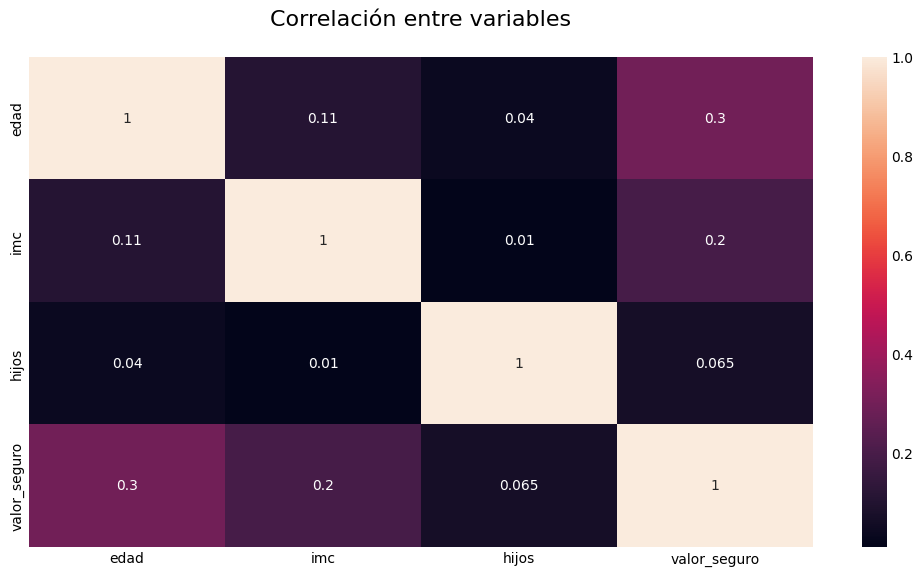

In [22]:
plt.figure(figsize=(10,5))
corr = df._get_numeric_data().corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.title('Correlación entre variables\n', {'fontsize': 16})
plt.show()

- 1 --> Mucha relación directa
- -1 --> Mucha relación inversa
- 0 --> Nada de relación

### 4.1.5 Análisis multivariado
 para realizar el análisis multivariado que implica más de dos variables, se tendrán en cuenta las que tienen una relación más cercana, como lo son el índice de masa corporal, la edad con respecto al valor pagado al seguro y una variable muy importante que se ha descubierto, que es la de fumador; se relacionarán tres variables en un mismo gráfico, con el objetivo de observar patrones.

Text(0.5, 1.0, 'Relación tres variables: valor seguro, rango de edad y el índice de masa corporal')

<Figure size 1000x500 with 0 Axes>

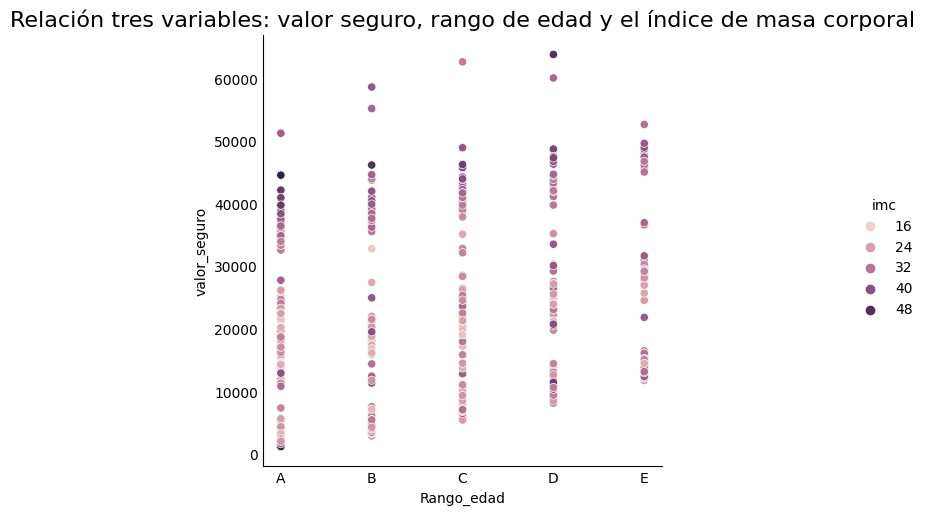

In [23]:
plt.figure(figsize=(10,5))
sns.relplot(x='Rango_edad' ,y='valor_seguro',hue='imc',data=df)
plt.title('Relación tres variables: valor seguro, rango de edad y el índice de masa corporal',
         {'fontsize': 16})

Los valores más altos pagados corresponden a todos los rangos de edad con un índice de masa corporal alto.

Text(0.5, 1.0, 'Relaciona tres variables: valor seguro, rango de edad y el indicador de fumador')

<Figure size 500x500 with 0 Axes>

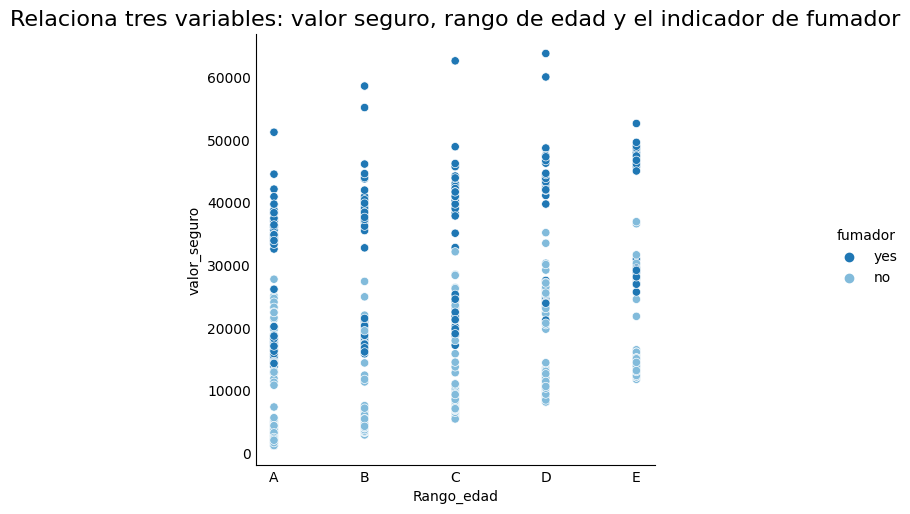

In [24]:
plt.figure(figsize=(5,5))
sns.relplot(x='Rango_edad' ,y='valor_seguro',hue='fumador',data=df)
plt.title('Relaciona tres variables: valor seguro, rango de edad y el indicador de fumador',
         {'fontsize': 16})

### Resultados
#### Para variable hijos:
- El 43 % de los usuarios no tienen hijos.
- Mientras que el 54 % al menos tiene un hijo.
- Solo un tres % tiene más de 3 hijos.

#### Para variable rango de edad:
- El rango representado con A, entre 18 y 28 años equivale al 29% de los datos.
- Para los rangos B, C y D, la equivalencia es del 20% sumando el 60% entre los 3.
- El rango E equivale al 10%.


### 4.1.4 Gráficos de Caja y Bigotes

Este tipo de gráfico que permite determinar la distribución de los datos con relación a dos variables
indicando los valores medios y cuartiles.
Siguiendo el ejemplo y para establecer la **relación entre el valor del seguro y el rango de edades** es
necesario ejecutar el siguiente comando:

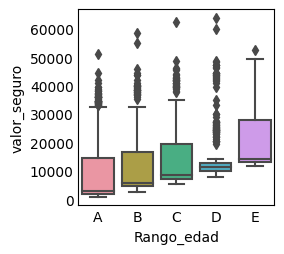

In [25]:
sns.boxplot(x=df['Rango_edad'], y=df['valor_seguro'])
plt.show()

Para establecer la **relación entre el valor del seguro y el estado fumador** ejecute el siguiente
comando:

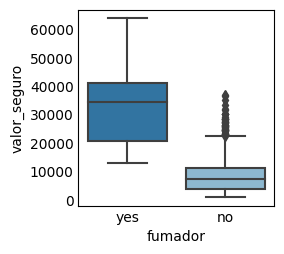

In [26]:
sns.boxplot(x=df["fumador"], y=df["valor_seguro"])
plt.show()

# Análisis de resultados y conclusiones
A continuación, se tomarán los resultados obtenidos para realizar la comparación y, de esta manera, se irá dando respuesta a las preguntas planteadas en el inicio del análisis de los datos; para este fin, se definen los siguientes pasos:

## Dando respuesta a las preguntas objetivo del negocio

##### a. ¿Las personas fumadoras representan el mayor potencial para ventas de seguros?
Se comparan el total de fumadores contra el valor del seguro.

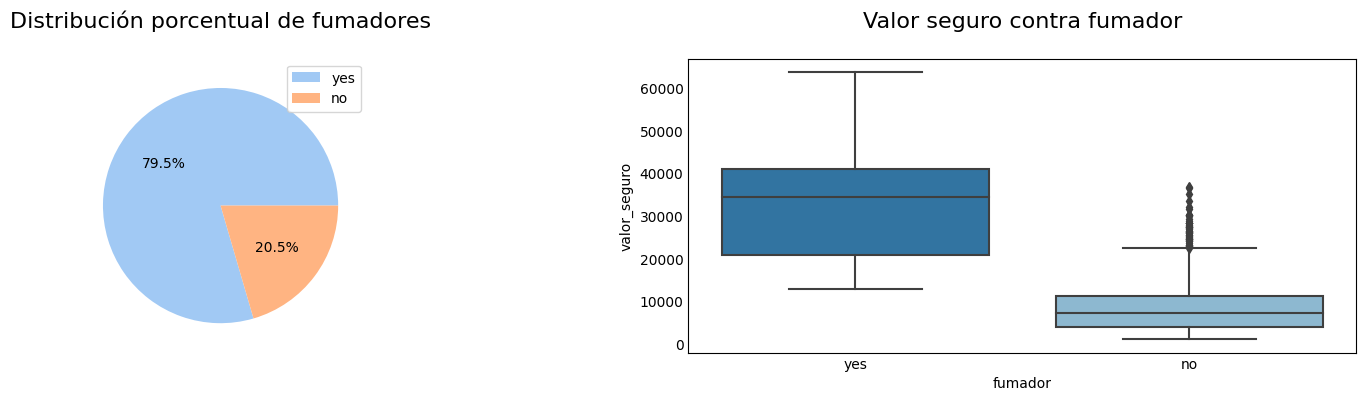

In [27]:
fig, axs = plt.subplots(1,2, figsize=(15,3))

total_fumadores = df['fumador'].groupby(df['fumador']).count()
labels_fumadores = df['fumador'].unique()
colors_fumadores = sns.color_palette('pastel')[0:2]

axs[0].pie(total_fumadores, colors=colors_fumadores, autopct='%.1f%%')
axs[0].legend(labels_fumadores)
axs[0].set_title('Distribución porcentual de fumadores\n',
                {'fontsize': 16})

sns.boxplot(x=df['fumador'], y=df['valor_seguro'])
axs[1].set_title('Valor seguro contra fumador\n',
                {'fontsize': 16})

plt.show()

La gráfica circular muestra que la mayor cantidad de clientes no son fumadores; la segunda gráfica muestra una distribución que indica que los que más alto pagan por el valor del seguro son los fumadores.

Para determinar el total de valores porcentualmente pagados al seguro por personas no fumadoras y fumadoras, se usa el siguiente comando, que permite generar ese análisis a través de un gráfico de total porcentual.

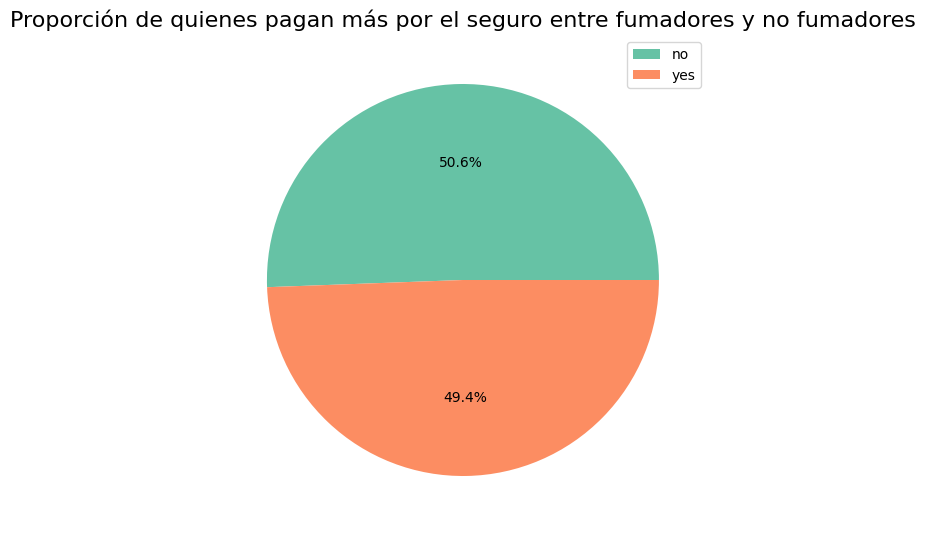

In [28]:
fig, ax = plt.subplots(figsize=(10,5))

total_rango_edad = df['valor_seguro'].groupby(df['fumador']).sum()

labels_rango_edad = total_rango_edad.index
colors_rango_edad = sns.color_palette('Set2')[0:5]

ax.pie(total_rango_edad, colors=colors_rango_edad, autopct='%.1f%%')
ax.legend(labels_rango_edad)
ax.set_title('Proporción de quienes pagan más por el seguro entre fumadores y no fumadores',
            {'fontsize': 16})
plt.show()

A pesar de que los clientes fumadores equivalen a un 20 %, y los no fumadores, al 80 %, pero en cuanto a los valores pagados al seguro, las sumas son iguales al 50 % aproximadamente del total del valor del seguro, lo que indica un precio mucho más elevado para los clientes fumadores.

##### b.¿Cuál es la edad poblacional en la que se debe concentrar la estrategia comercial teniendo en cuenta el mayor ingreso?
Comparar los valores porcentualmente pagados al seguro de acuerdo con el rango de edad.

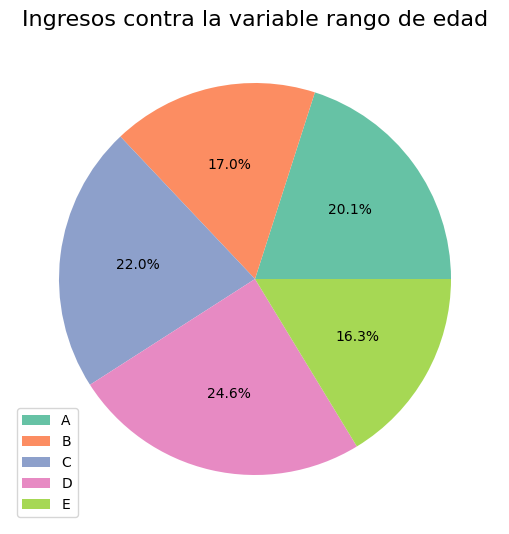

In [29]:
plt.figure(figsize=(10,5))
total_rango_edad = df['valor_seguro'].groupby(df['Rango_edad']).sum()
labels_rango_edad = total_rango_edad.index
colors_rango_edad = sns.color_palette('Set2')[0:5]

plt.pie(total_rango_edad, colors = colors_rango_edad, autopct='%.1f%%')
plt.legend(labels_rango_edad)
plt.title('Ingresos contra la variable rango de edad',
            {'fontsize': 16})
plt.show()

Los resultados arrojados muestran porcentajes más equilibrados en todos los rangos de edad.

##### c.¿Cuál es la región con mayor potencial de venta de seguros teniendo en cuenta los ingresos?
Para establecer relaciones entre el valor pagado, estado fumador y la región, es necesario ejecutar el siguiente comando para determinar relación por regiones y valores pagados.

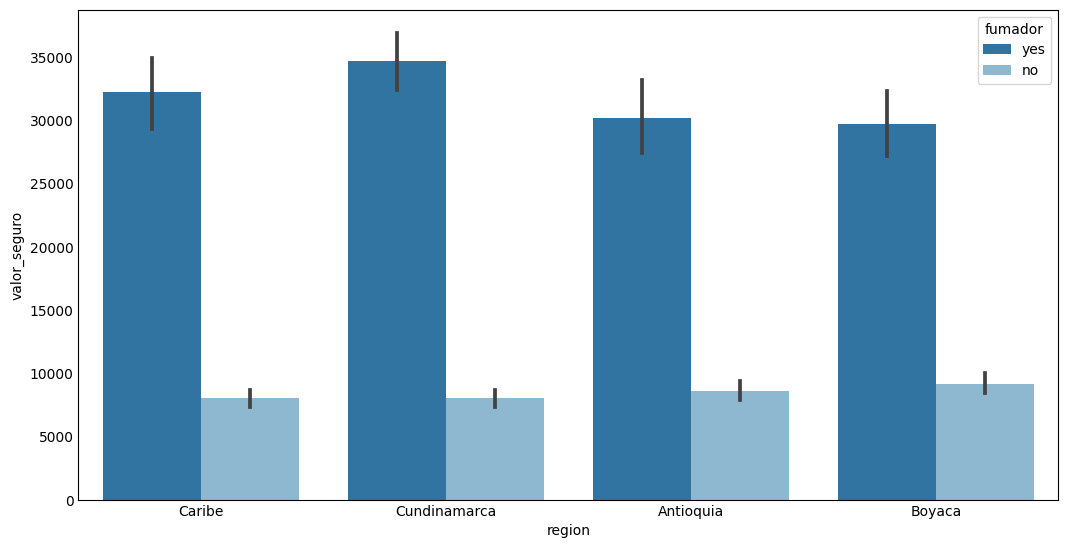

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['region'], y=df['valor_seguro'], hue=df['fumador'])
plt.show()

Lo ingresos por Región están muy cercanos, pero aún así, se puede notar que Cundinamarca es la región que más ingresos tiene con la venta de seguros. 

## Conclusiones
Partiendo de las preguntas planteadas y los resultados obtenidos en el análisis de un solo dato y multivariado, se pueden generar las siguientes conclusiones:

- El 80 % de los registros analizados no son fumadores.

- Cerca del 45 % de los clientes no tienen hijos.

- Aproximadamente, el 70 % de los clientes tiene al menos un hijo.

- El rango de edad para el rango A representa cerca del 30 % del total de registros.

- Los valores pagados al seguro por los clientes identificados como fumadores equivalen al 50 % del total.

- A pesar de que los clientes no fumadores equivalen al 80 %, solo representan el 50 % del valor total del seguro.

- La región no es determinante en el valor del seguro.

- Lo más relevante en los valores pagados al seguro se dio en personas que son fumadores